## Assignment: $k$ Means Clustering

## **Do two questions.**

`! git clone https://www.github.com/DS3001/kmc`

In [1]:
! git clone https://www.github.com/DS3001/kmc

Cloning into 'kmc'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 25 (delta 2), reused 1 (delta 1), pack-reused 21
Receiving objects: 100% (25/25), 5.04 MiB | 28.07 MiB/s, done.
Resolving deltas: 100% (4/4), done.


**Q1.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

In [2]:
# Q1.1
# Load the airbnb_hw.csv data. Clean Price along with Beds, Number of Reviews, and Review Scores Rating.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/kmc/data/airbnb_hw.csv', low_memory=False)

In [4]:
df.head()
df['Price'].unique()
df['Price'] = df['Price'].str.replace(',', '')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Price'].unique()

array([  145,    37,    28,   199,   549,   149,   250,    90,   270,
         290,   170,    59,    49,    68,   285,    75,   100,   150,
         700,   125,   175,    40,    89,    95,    99,   499,   120,
          79,   110,   180,   143,   230,   350,   135,    85,    60,
          70,    55,    44,   200,   165,   115,    74,    84,   129,
          50,   185,    80,   190,   140,    45,    65,   225,   600,
         109,  1990,    73,   240,    72,   105,   155,   160,    42,
         132,   117,   295,   280,   159,   107,    69,   239,   220,
         399,   130,   375,   585,   275,   139,   260,    35,   133,
         300,   289,   179,    98,   195,    29,    27,    39,   249,
         192,   142,   169,  1000,   131,   138,   113,   122,   329,
         101,   475,   238,   272,   308,   126,   235,   315,   248,
         128,    56,   207,   450,   215,   210,   385,   445,   136,
         247,   118,    77,    76,    92,   198,   205,   299,   222,
         245,   104,

After coercion: 
 count    30393.000000
mean         1.530089
std          1.015359
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         16.000000
Name: Beds, dtype: float64 

Total Missings: 
 85 



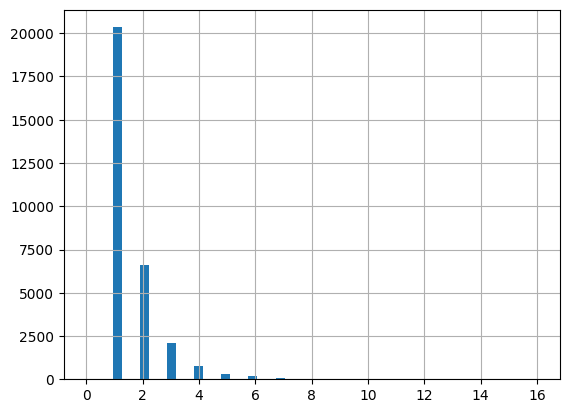

In [5]:
df['Beds'].unique()
df['Beds'].value_counts()
df['Beds'+'_nan'] = df['Beds'].isnull()
print('After coercion: \n', df['Beds'].describe(),'\n')
df['Beds'].hist(bins = 50)
print('Total Missings: \n', sum(df['Beds'+'_nan']),'\n')
#impute missing values
impute_value = df['Beds'].median()
df['Beds'+'_impute'] = df['Beds'].fillna(impute_value)

In [6]:
df['Number Of Reviews'].unique()
df['Number Of Reviews'].value_counts()
# clean

0      7814
1      3572
2      2457
3      1764
4      1382
       ... 
216       1
191       1
213       1
178       1
130       1
Name: Number Of Reviews, Length: 205, dtype: int64

After coercion: 
 count    22155.000000
mean        91.993230
std          8.850373
min         20.000000
25%         89.000000
50%         94.000000
75%        100.000000
max        100.000000
Name: Review Scores Rating, dtype: float64 

Total Missings: 
 8323 



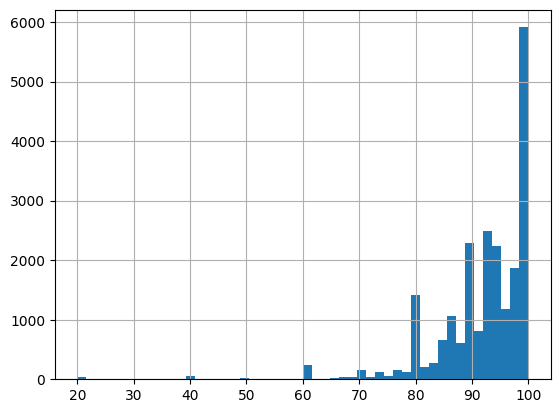

In [7]:
df['Review Scores Rating'].unique()
df['Review Scores Rating'].value_counts()
df['Review Scores Rating'+'_nan'] = df['Review Scores Rating'].isnull()
print('After coercion: \n', df['Review Scores Rating'].describe(),'\n')
df['Review Scores Rating'].hist(bins = 50)
print('Total Missings: \n', sum(df['Review Scores Rating'+'_nan']),'\n')
impute_value = df['Review Scores Rating'].median()
df['Review Scores Rating'+'_impute'] = df['Review Scores Rating'].fillna(impute_value)

In [34]:
# Q 1.2
# Maxmin normalize the data and remove any nan's (KMeans from sklearn doesn't accept nan input).
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)
X = df.loc[ : , ['Price','Beds_impute','Number Of Reviews','Review Scores Rating_impute'] ]
X1 = X.apply(maxmin)
X1 = X1.drop('Price', axis=1)

In [9]:
# Q1.3
# Use sklearn's KMeans module to cluster the data by Beds, Number of Reviews, and Review Scores Rating for k=6.
from sklearn.cluster import KMeans

In [35]:
model = KMeans(n_clusters=6, max_iter=300, n_init = 10, random_state=0)

model = model.fit(X1)

X1['g_hat'] = model.labels_
X1.describe()

,Beds_impute,Number Of Reviews,Review Scores Rating_impute,g_hat
count,30478.000000,30478.000000,30478.000000,30478.000000
mean,0.095538,0.046766,0.906766,2.952622
std,0.063395,0.085528,0.094982,1.546806
min,0.000000,0.000000,0.000000,0.000000
25%,0.062500,0.000000,0.875000,1.000000
50%,0.062500,0.011673,0.925000,4.000000
75%,0.125000,0.050584,0.962500,4.000000
max,1.000000,1.000000,1.000000,5.000000


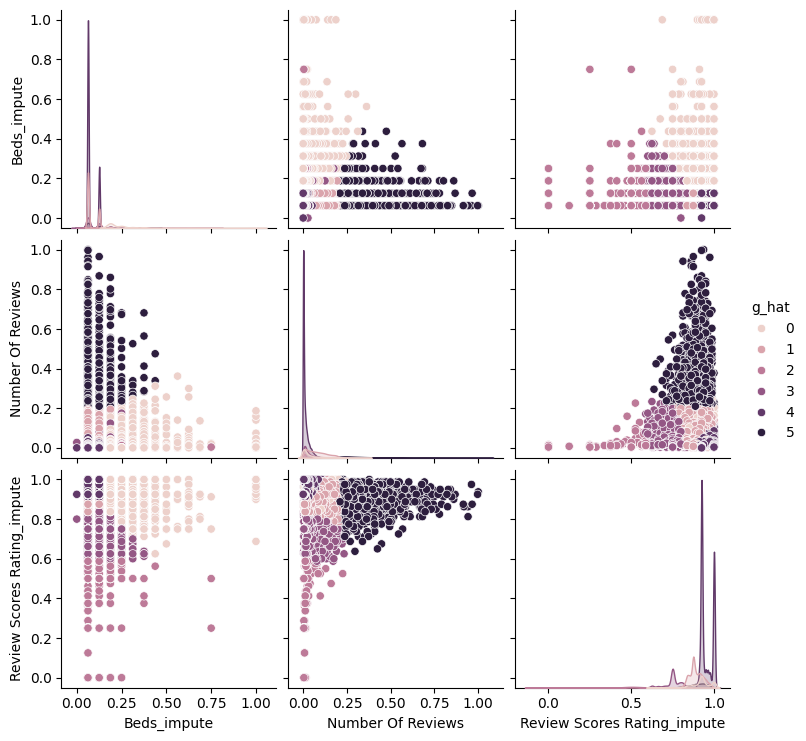

In [36]:
# Q1.4
# Use seaborn's .pairplot() to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
sns.pairplot(data=X1, hue='g_hat')
plt.show()

In [37]:
# Q1.5
# Use .groupby and .describe to compute the average price for each cluster. Which clusters have the highest rental prices?
X['g_hat'] = model.labels_
X.loc[:,['Price','g_hat']].groupby('g_hat').describe()
# cluster 0 has the highest rental prices by a large margin, with a mean of 331 more than twice as much as the next highest mean of 154.
# There are no maximum or minimum outliers, though the IQR values are all higher, showing this cluster is consistently higher, on average.

Price                                                              
         count        mean         std   min     25%    50%     75%      max
g_hat                                                                       
0       2679.0  331.381112  415.945062  26.0  150.00  247.0  375.00   8000.0
1       6344.0  138.743222  146.829396  22.0   82.00  120.0  175.00  10000.0
2        450.0  130.791111  245.314908  25.0   60.75   90.0  150.00   5000.0
3       2934.0  134.503749  126.129166  20.0   73.25  110.0  170.00   5000.0
4      16411.0  154.590823  160.423455  10.0   80.00  125.0  189.00   5000.0
5       1660.0  137.018675   82.719846  27.0   84.00  120.0  171.25    875.0

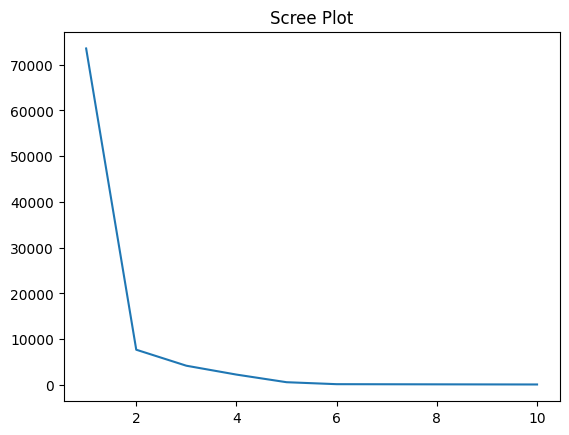

In [38]:
# Q1.6
# Use a scree plot to pick the number of clusters and repeat steps 4 and 5.
k_bar = 10
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(X1)
    SSE[k] = model.inertia_

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')
# 2 appears to be the best value of k, since it includes over 80% of the data and it drastically flattens out afterward.

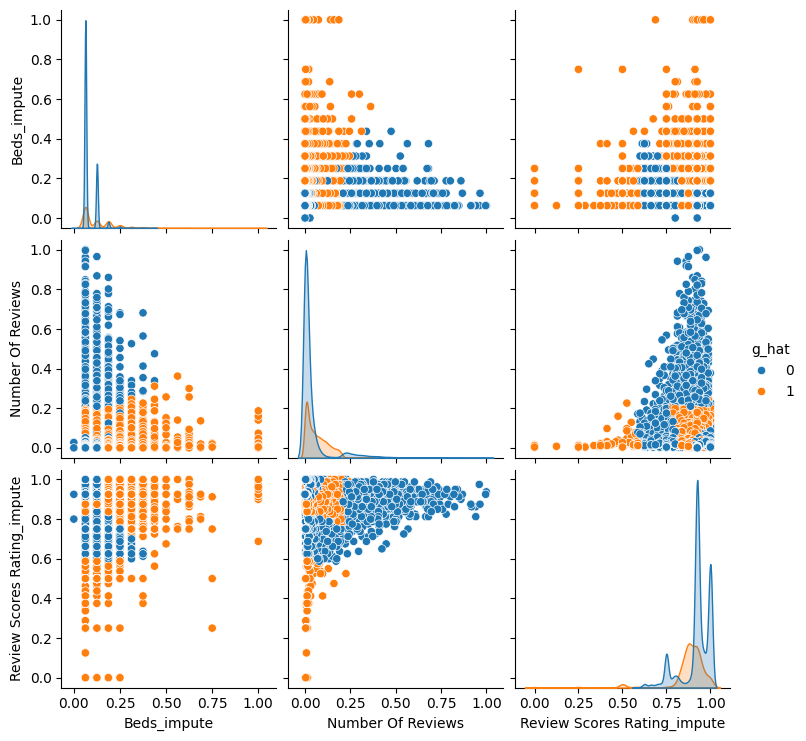

In [40]:
# model and step 4
model = KMeans(n_clusters=2, max_iter=300, n_init = 10, random_state=0)

model = model.fit(X1)

X1['g_hat'] = model.labels_
X1.describe()

sns.pairplot(data=X1, hue='g_hat')
plt.show()

In [41]:
X['g_hat'] = model.labels_
X.loc[:,['Price','g_hat']].groupby('g_hat').describe()
# cluster 1 has the highest rental prices, but this is probably not very conclusive, since 2 clusters can very much overgeneralize the data.
# the price of 10000 might be an outlier, since the other IQR values are much lower.

Price                                                           
         count        mean         std   min   25%    50%    75%      max
g_hat                                                                    
0      21005.0  150.396334  151.432741  10.0  80.0  120.0  180.0   5000.0
1       9473.0  192.844189  271.617676  22.0  90.0  140.0  209.0  10000.0

**Q2.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,1,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,1,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,1,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [ ]:
# Q2.1
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,1,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,1,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,1,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

In [ ]:
# Q2.2
# Make scatterplots of the  (X1,X2)  points by group for each of the datasets.
# As the noise goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='x1', ylabel='x2'>

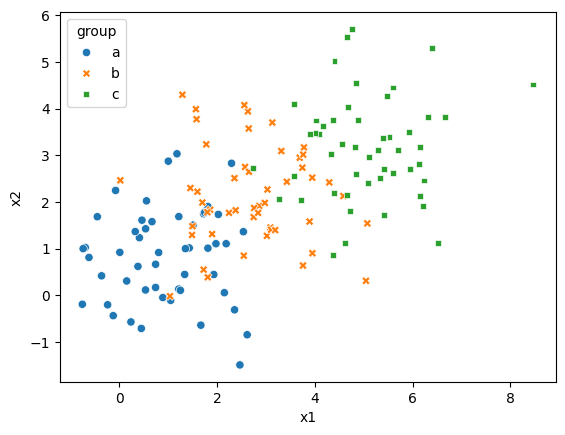

In [ ]:
sns.scatterplot(data = df0_125, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

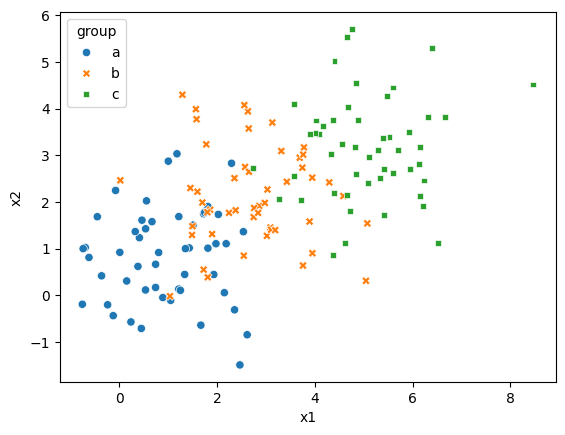

In [ ]:
sns.scatterplot(data = df0_25, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

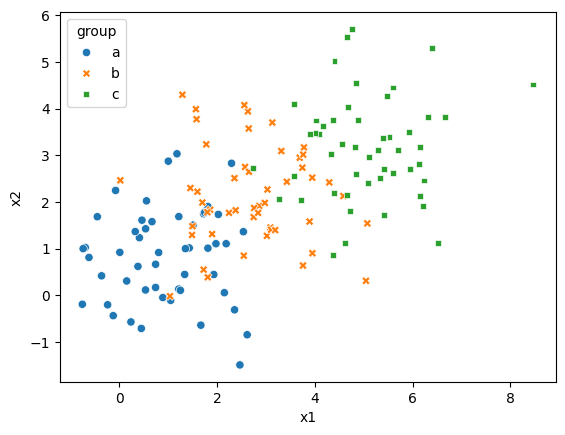

In [ ]:
sns.scatterplot(data = df0_5, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

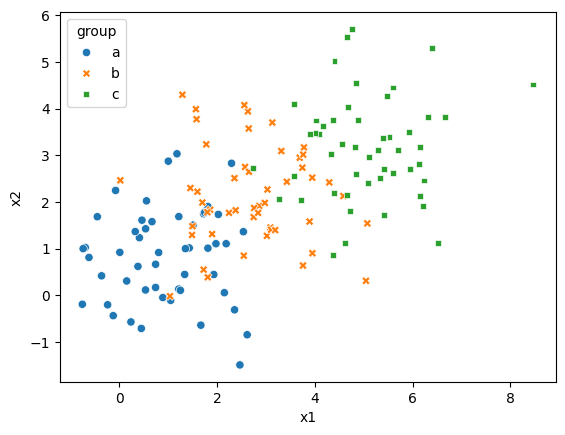

In [ ]:
sns.scatterplot(data = df1_0, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

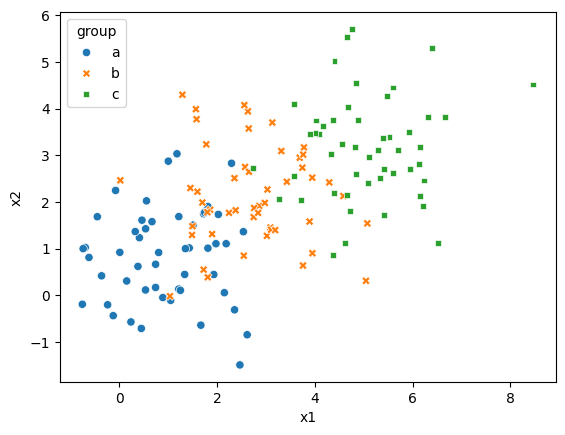

In [ ]:
sns.scatterplot(data = df2_0, x = 'x1',y='x2',hue='group',style='group')

In [ ]:
# all 5 plots are the same, code error

**Q3.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?